# Making map plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from matplotlib.patches import Patch
import matplotlib as mpl


### Import the data

In [76]:
dataset = pd.read_csv('../../Data/Data Sets/cleaned_dataset.csv')


# https://geoportal.statistics.gov.uk/datasets/0f80c523f3cd4d0fab5111572f84a2fb_0/explore
lsoa_shapes = gpd.read_file('../../Data/LSOA_Data/LSOA_boundaries/LSOA_2021_EW_BSC_V4.shp')



merseyside = pd.merge(lsoa_shapes[['LSOA21CD', 'geometry']], 
                      dataset[dataset['PoliceDept'] == 'Merseyside'], 
                      on='LSOA21CD', 
                      how='right')

london = pd.merge(lsoa_shapes[['LSOA21CD', 'geometry']], 
                  dataset[dataset['PoliceDept'] == 'London'], 
                  on='LSOA21CD', 
                  how='right')


C:\Users\15kof\AppData\Local\Temp\ipykernel_16652\4038056347.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


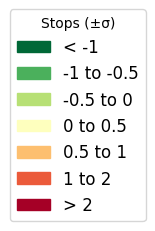

In [99]:
bins = [-float('inf'), -1, -0.5,  0, 0.5, 1, 2, float('inf')]
bin_labels = [
    '< -1',
    '-1 to -0.5',
    '-0.5 to 0',
    '0 to 0.5',
    '0.5 to 1',
    '1 to 2',
    '> 2'
]



# Define colour mapping based on the bins
cmap = mpl.cm.RdYlGn_r


norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

# Create legend handles with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Create a new figure for the legend
fig, ax = plt.subplots(figsize=(1, 1))  # Adjust the size as needed

# Add the legend to the new plot
ax.legend(handles=legend_handles, title="Stops (±σ)", loc='center', fontsize=12)

# Remove axis
ax.set_axis_off()

# Adjust layout to avoid clipping
plt.tight_layout()

# Save the legend plot separately
plt.savefig('../../Figures/Map Visualisations/legend_plot.svg', bbox_inches='tight')

# Show the legend plot
plt.show()

## Plot the MERSEYSIDE LSOA Stop count

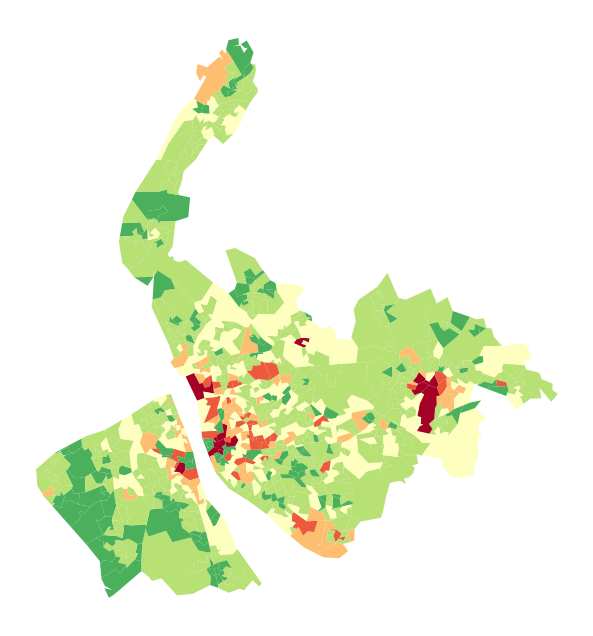

In [100]:
# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merseyside.plot(column='CrimeSum_z', 
                  linewidth=0, 
                  edgecolor='lightgrey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap, 
                  norm=norm,
                  vmin=bins[0], vmax=bins[len(bin_labels)-1])


# Create legend with boxes for each bin
# legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]



# Add legend to the plot
# ax.legend(handles=legend_handles, title="Stops (±σ)", loc='upper right')
# ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
# ax.get_legend().set_loc('center left')



ax.set_axis_off()
plt.savefig('../../Figures/Map Visualisations/merseyside_stops_map.svg', bbox_inches='tight')

plt.show()


## Plot the LONDON LSOA Stop count

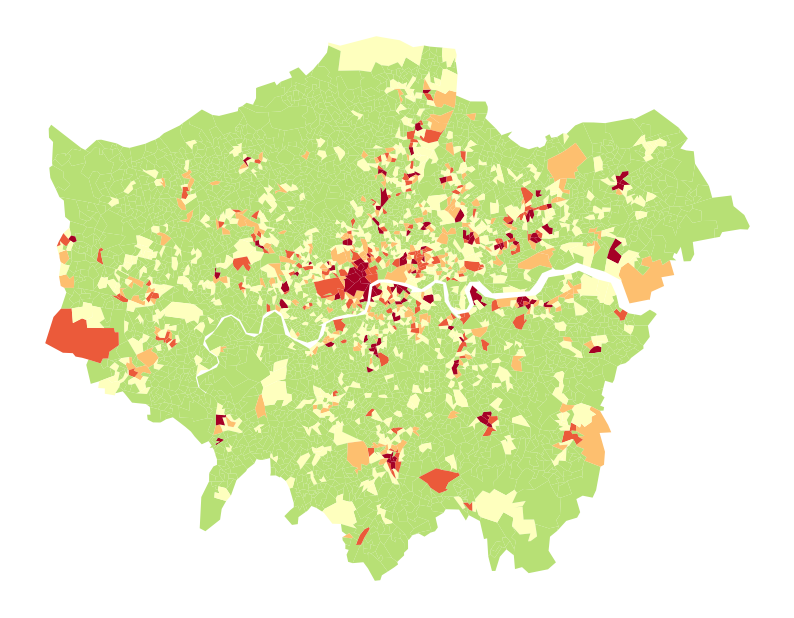

In [102]:



# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

london.plot(column='StopCount_z', 
                  linewidth=0, 
                  edgecolor='lightgrey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap, 
                  norm=norm,
                  vmin=bins[0], vmax=bins[len(bin_labels)-1])


# Create legend with boxes for each bin
# legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]



# Add legend to the plot
# ax.legend(handles=legend_handles, title="Stops (±σ)", loc='upper right')
# ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
# ax.get_legend().set_loc('center left')



ax.set_axis_off()
plt.savefig('../../Figures/Map Visualisations/london_stops_map.svg', bbox_inches='tight')

plt.show()


# Gini

C:\Users\15kof\AppData\Local\Temp\ipykernel_16652\3127787910.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('RdYlGn_r')


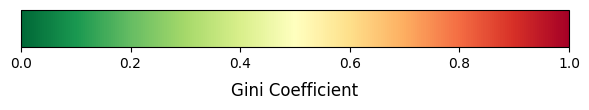

In [103]:


# Create a figure and axis for a horizontal colourbar
fig, ax = plt.subplots(figsize=(6, 1.2))  # Wide and short for horizontal

# Normalise for gini range — adjust if needed
cmap = plt.cm.get_cmap('RdYlGn_r')
norm = mpl.colors.Normalize(vmin=0, vmax=1)

# Create horizontal colourbar
cbar = mpl.colorbar.ColorbarBase(ax,
                                 cmap=cmap,
                                 norm=norm,
                                 orientation='horizontal')
cbar.set_label('Gini Coefficient', fontsize=12, labelpad=8)
cbar.ax.tick_params(labelsize=10)

# Save or show
plt.tight_layout()
plt.savefig('../../Figures/Map Visualisations/gini_colourbar.svg', bbox_inches='tight')
plt.show()


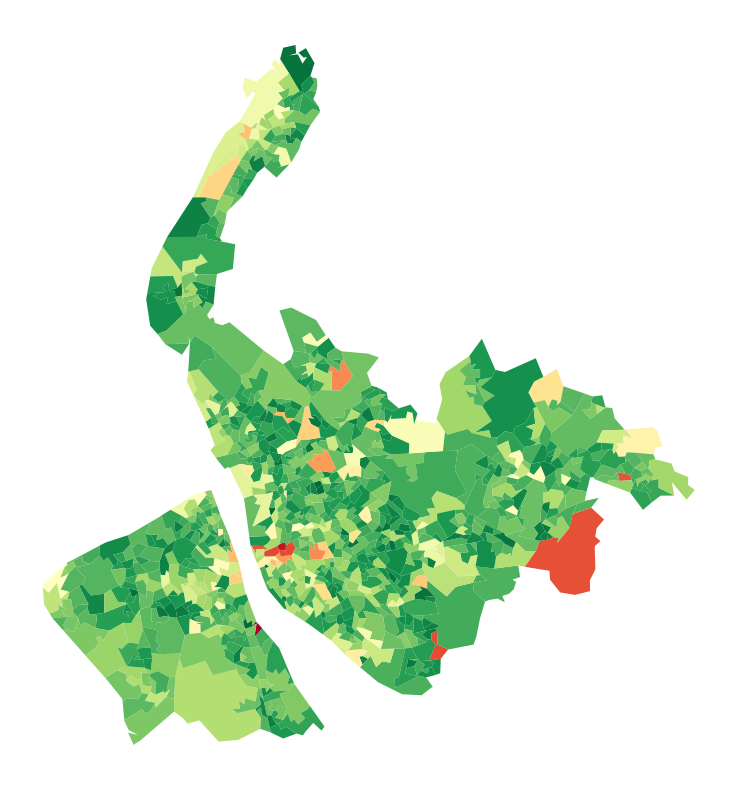

In [104]:

fig, ax = plt.subplots(figsize=(10, 8))

merseyside.plot(column='gini',
                cmap='RdYlGn_r',
                linewidth=0,
                # edgecolor='grey',
                # legend=True,
                ax=ax)

ax.set_axis_off()

# Optional save
plt.savefig('../../Figures/Map Visualisations/merseyside_gini_map.svg', bbox_inches='tight')

plt.tight_layout()
plt.show()


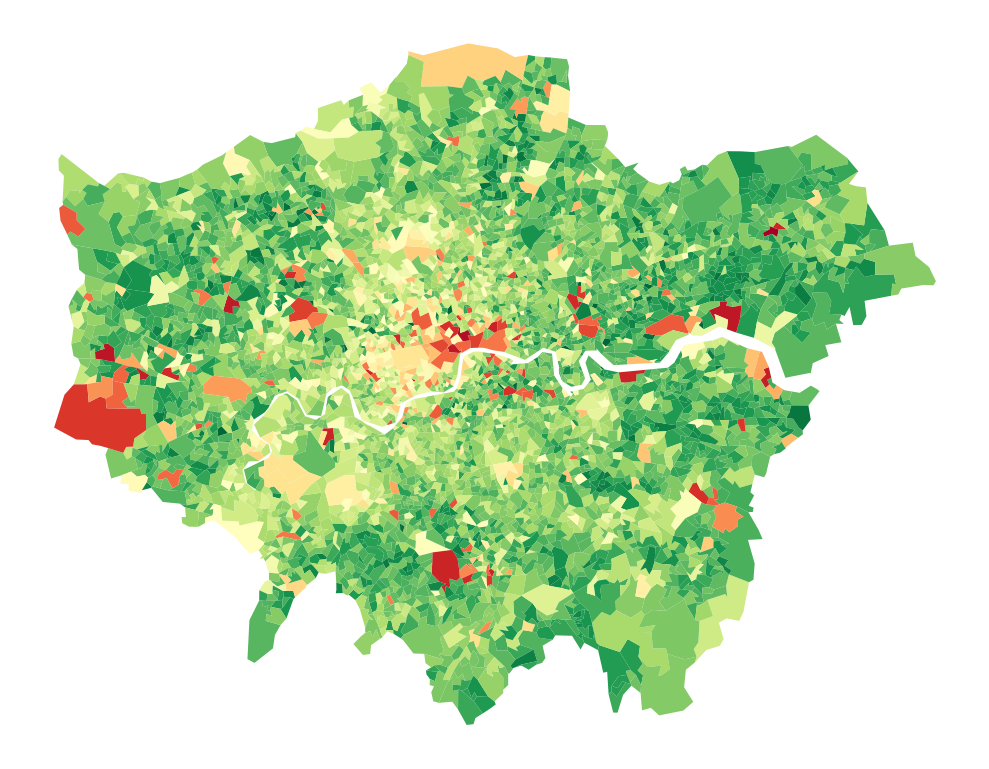

In [105]:
fig, ax = plt.subplots(figsize=(10, 8))

london.plot(column='gini',
                cmap='RdYlGn_r',
                linewidth=0,
                edgecolor='grey',
                # legend=True,
                ax=ax)

ax.set_axis_off()

# save
plt.savefig('../../Figures/Map Visualisations/london_gini_map.svg', bbox_inches='tight')

plt.tight_layout()
plt.show()


# Crime Data

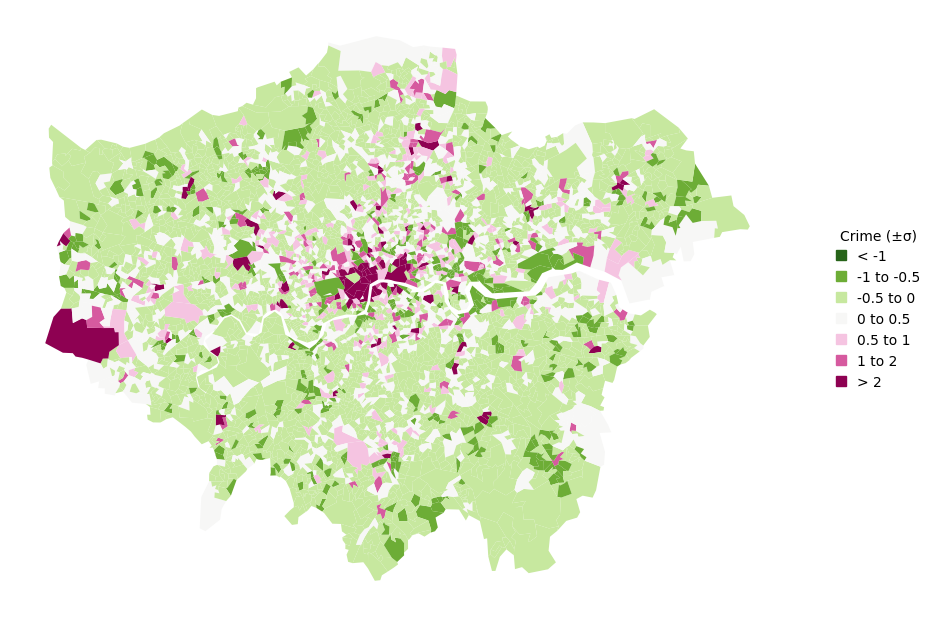

In [ ]:
# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

london.plot(column='CrimeSum_z', 
                  linewidth=0.1, 
                #   edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, 
          title="Crime (±σ)", 
          loc='upper right',
          frameon=False,
          handlelength=0.7)

ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
# plt.savefig('../figures_and_plots/london_crime_map.svg', bbox_inches='tight')

# Show the plot
plt.show()


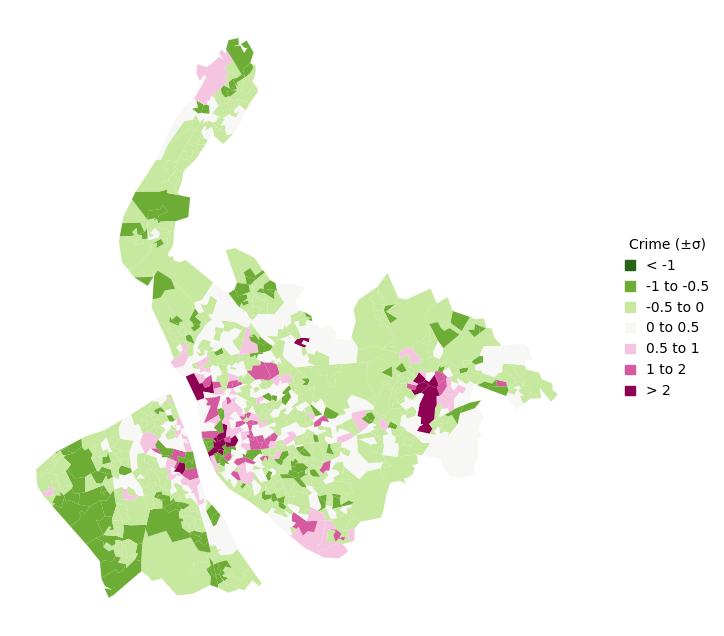

In [ ]:
# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merseyside.plot(column='CrimeSum_z', 
                  linewidth=0.1, 
                #   edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, 
          title="Crime (±σ)", 
          loc='upper right',
          frameon=False,
          handlelength=0.7)

ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
# plt.savefig('../figures_and_plots/merseyside_crime_map.svg', bbox_inches='tight')

# Show the plot
plt.show()


# Plotting the HOUSE PRICES

## Merseyside

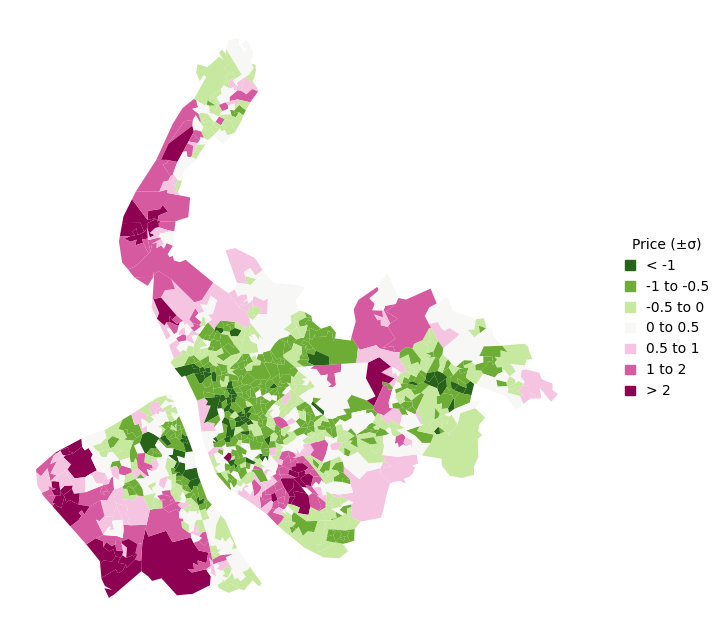

In [ ]:
# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merseyside.plot(column='MeanHousePrice_z', 
                  linewidth=0.1, 
                #   edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, 
          title="Price (±σ)", 
          loc='upper right',
          frameon=False,
          handlelength=0.7)

ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
# plt.savefig('../figures_and_plots/merseyside_houseprice_map.svg', bbox_inches='tight')

# Show the plot
plt.show()


## London

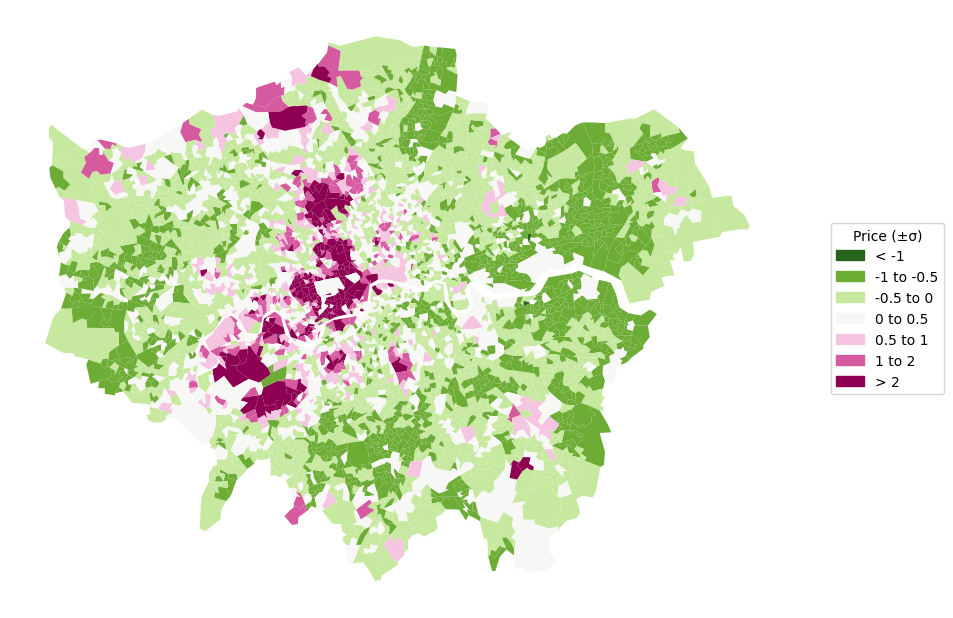

In [ ]:
# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

london.plot(column='MeanHousePrice_z', 
                  linewidth=0.1, 
                #   edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, title="Price (±σ)", loc='upper right')
ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
# plt.savefig('../figures_and_plots/london_houseprice_map.svg', bbox_inches='tight')

# Show the plot
plt.show()


# Plotting the Ethnic distribution

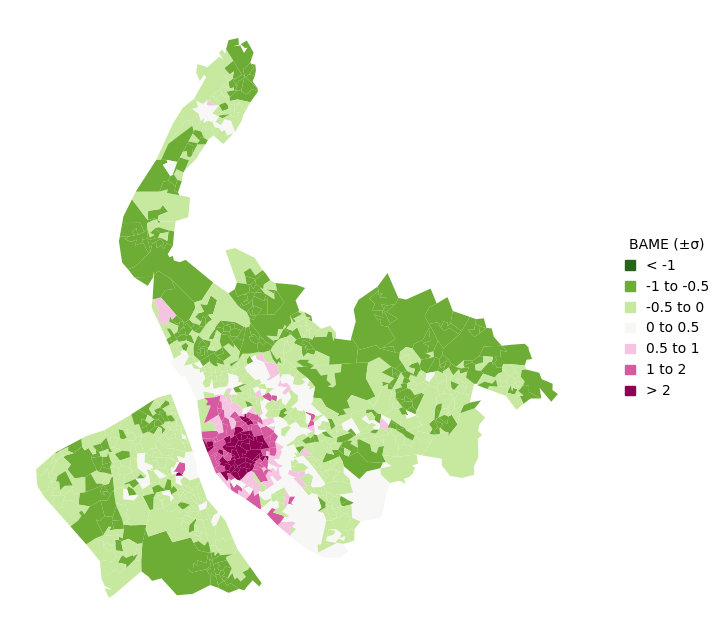

In [ ]:
# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merseyside.plot(column='BAME_z', 
                  linewidth=0.1, 
                #   edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, 
          title="BAME (±σ)", 
          loc='upper right',
          frameon=False,
          handlelength=0.7)

ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
# plt.savefig('../figures_and_plots/merseyside_BAME_map.svg', bbox_inches='tight')

# Show the plot
plt.show()


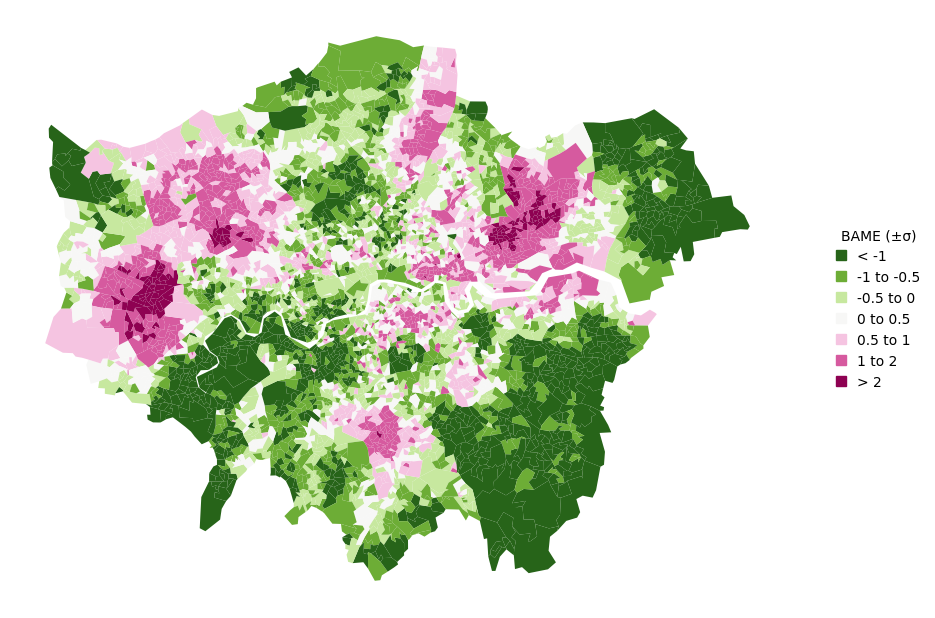

In [ ]:
# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

london.plot(column='BAME_z', 
                  linewidth=0.1, 
                #   edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, 
          title="BAME (±σ)", 
          loc='upper right',
          frameon=False,
          handlelength=0.7)

ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
# plt.savefig('../figures_and_plots/london_BAME_map.svg', bbox_inches='tight')

# Show the plot
plt.show()
